<a href="https://colab.research.google.com/github/PhDSGilber/Embeddings-to-Named-entity-recognition-NER-use-Deep-Learning/blob/main/NER_CoNLL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conference on Natural Language Learning (CoNLL) - 2002**

CONLL-2002 is a leading resource in the field of natural language processing, specifically in the area of named entity recognition (NER). This dataset was presented at the Conference on Natural Machine and Language Learning (CoNLL) in 2002, with the main goal of establishing a standard for the evaluation and comparison of different methods and algorithms in NER tasks.

The CONLL-2002 dataset is made up of texts in two languages: Spanish and Dutch. These texts come primarily from news sources, providing a realistic and challenging environment for the application of NER techniques. The data is annotated with information about named entities, classifying them into categories such as names of people, locations, organizations, and others.

The creation of CONLL-2002 arose from the need for a standardized data set that would allow researchers and developers in the field of natural language processing to effectively compare the accuracy and effectiveness of different applied machine learning approaches and models. to the task of NER. This dataset has become a fundamental reference for the scientific community, providing a common framework for advancement and innovation in named entity recognition.

Reference:
*   https://www.clips.uantwerpen.be/conll2002/ner/
*   https://paperswithcode.com/dataset/conll-2002
*   https://aclanthology.org/W02-2024/




# **Exploratory Data Analysis (EDA)**

In [ ]:
#Requirements

!pip install datasets transformers seqeval

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
from itertools import chain
from collections import Counter

In [ ]:
# Upload dataset
dataset = load_dataset("conll2002", "es")

In [ ]:
# Convert Dataset2df
def dataset_to_dataframe(dataset):
    df = pd.DataFrame(dataset)
    df['token_count'] = df['tokens'].apply(len)
    return df

In [ ]:
# Convert Dataset2df
def flatten_and_count_tags(dataset, tag_mapping, tag_column):
    all_tags = list(chain.from_iterable(dataset[tag_column]))
    tag_names = [tag_mapping[tag] for tag in all_tags]
    return Counter(tag_names)

In [ ]:
# Dataset to df
train_df = dataset_to_dataframe(dataset['train'])
val_df = dataset_to_dataframe(dataset['validation'])
test_df = dataset_to_dataframe(dataset['test'])

# AED
train_df

,id,tokens,pos_tags,ner_tags,token_count
0,0,"[Melbourne, (, Australia, ), ,, 25, may, (, EF...","[29, 21, 29, 22, 13, 59, 28, 21, 28, 22, 20]","[5, 0, 5, 0, 0, 0, 0, 0, 3, 0, 0]",11
1,1,[-],[16],[0],1
2,2,"[El, Abogado, General, del, Estado, ,, Daryl, ...","[4, 28, 1, 40, 28, 13, 47, 28, 13, 47, 38, 4, ...","[0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, ...",40
3,3,"[La, petición, del, Abogado, General, tiene, l...","[4, 28, 40, 28, 1, 47, 28, 38, 40, 3, 7, 28, 4...","[0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, ...",61
4,4,"[Esta, página, web, lleva, un, mes, de, existe...","[6, 28, 1, 47, 7, 28, 40, 28, 13, 28, 40, 4, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",50
...,...,...,...,...,...
8319,8319,"[Pese, a, las, nuevas, manifestaciones, de, lo...","[48, 40, 4, 1, 28, 40, 4, 28, 40, 28, 13, 4, 2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, ...",34
8320,8320,"[Ese, día, se, reunirán, los, ministros, de, R...","[6, 28, 30, 47, 4, 28, 40, 28, 1, 13, 28, 28, ...","[0, 0, 0, 0, 0, 0, 0, 7, 8, 0, 1, 2, 0, 0, 7, ...",37
8321,8321,"[El, Movimiento, ocupó, hace, tres, semanas, e...","[4, 28, 47, 47, 8, 28, 28, 1, 40, 8, 28, 40, 2...","[0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",52
8322,8322,"[Tras, abandonar, las, oficinas, ocupadas, y, ...","[40, 49, 4, 28, 1, 2, 49, 4, 28, 40, 28, 1, 13...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, ...",35


In [ ]:
print("General information of dataset")
print(train_df.info())

General information of dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8324 entries, 0 to 8323
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           8324 non-null   object
 1   tokens       8324 non-null   object
 2   pos_tags     8324 non-null   object
 3   ner_tags     8324 non-null   object
 4   token_count  8324 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 325.3+ KB
None


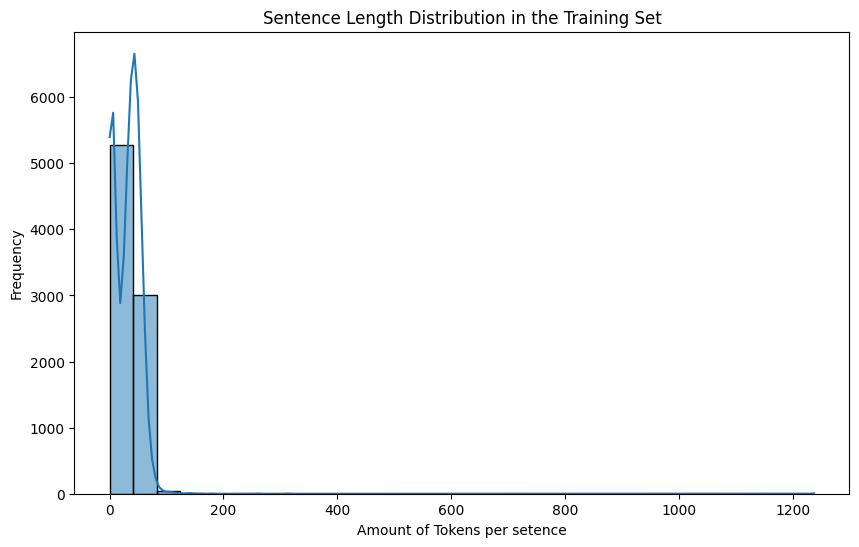

In [ ]:
# Analysis of sentence length (in terms of number of tokens)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['token_count'], bins=30, kde=True)
plt.title("Sentence Length Distribution in the Training Set")
plt.xlabel("Amount of Tokens per setence")
plt.ylabel("Frequency")
plt.show()

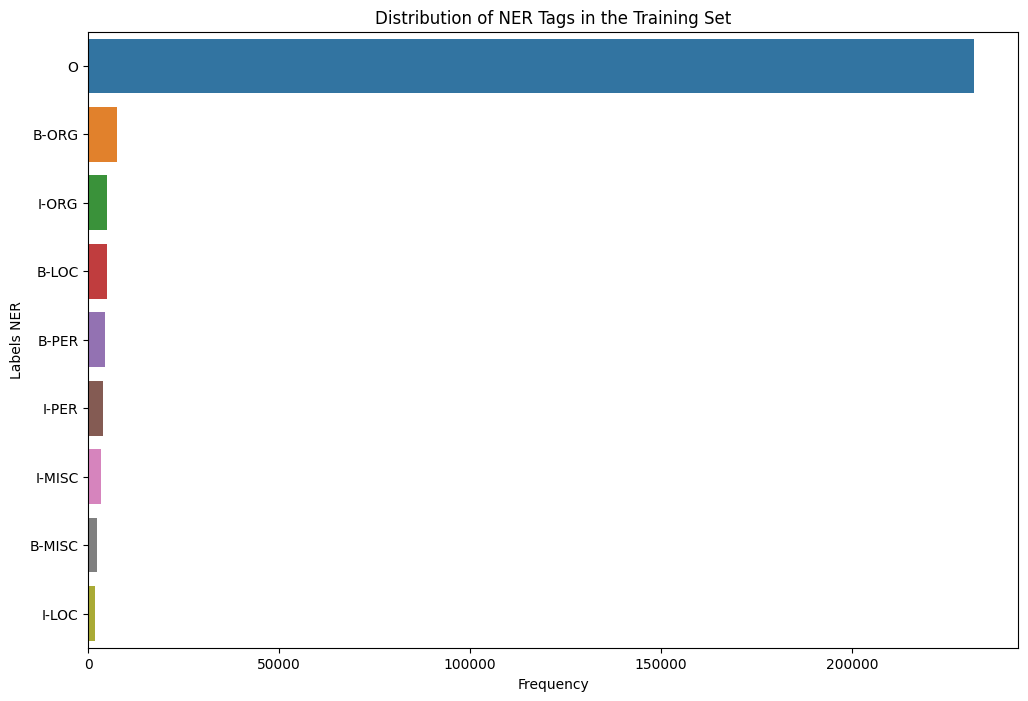

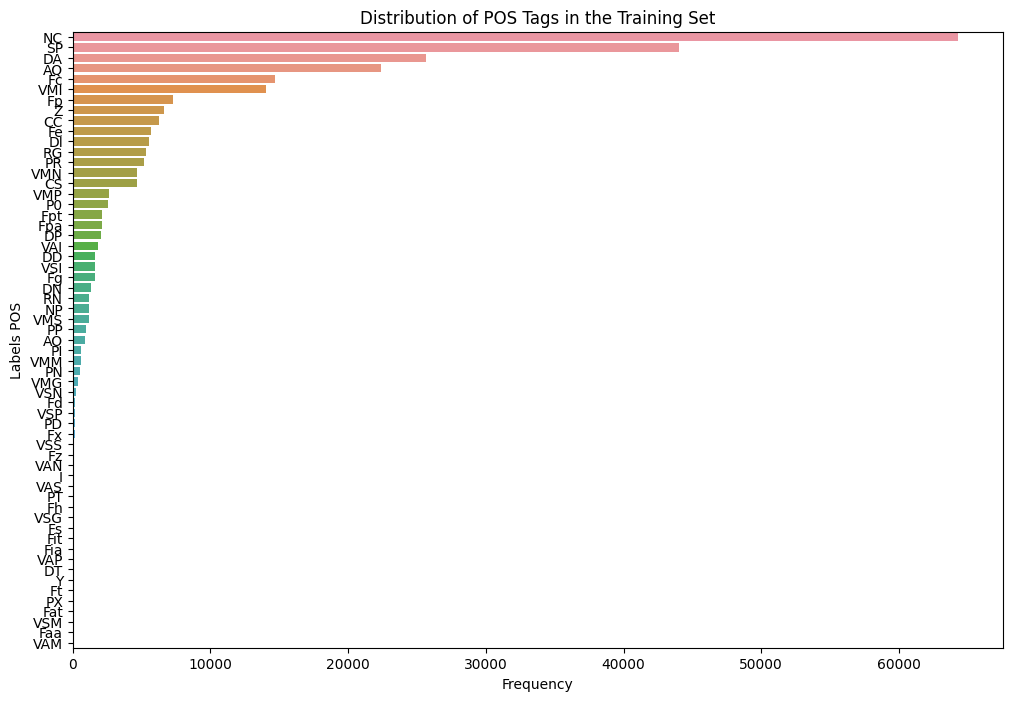

In [ ]:
# Mapeos de las etiquetas
ner_index = ["O", "B-PER", "I-PER", "B-ORG", "I-ORG", "B-LOC", "I-LOC", "B-MISC", "I-MISC"]
pos_index = ['AO', 'AQ', 'CC', 'CS', 'DA', 'DE', 'DD', 'DI', 'DN', 'DP', 'DT', 'Faa', 'Fat', 'Fc', 'Fd', 'Fe', 'Fg', 'Fh', 'Fia', 'Fit', 'Fp', 'Fpa', 'Fpt', 'Fs', 'Ft', 'Fx', 'Fz', 'I', 'NC', 'NP', 'P0', 'PD', 'PI', 'PN', 'PP', 'PR', 'PT', 'PX', 'RG', 'RN', 'SP', 'VAI', 'VAM', 'VAN', 'VAP', 'VAS', 'VMG', 'VMI', 'VMM', 'VMN', 'VMP', 'VMS', 'VSG', 'VSI', 'VSM', 'VSN', 'VSP', 'VSS', 'Y', 'Z']

# Frecuency of NER
ner_counts = flatten_and_count_tags(dataset['train'], ner_index, 'ner_tags')
df_ner = pd.DataFrame(ner_counts.items(), columns=['NER Tag', 'Count']).sort_values('Count', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='NER Tag', data=df_ner)
plt.title("Distribution of NER Tags in the Training Set")
plt.xlabel("Frequency")
plt.ylabel("Labels NER")
plt.show()

# Frecuency of POS
pos_counts = flatten_and_count_tags(dataset['train'], pos_index , 'pos_tags')
df_pos = pd.DataFrame(pos_counts.items(), columns=['POS Tag', 'Count']).sort_values('Count', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='POS Tag', data=df_pos)
plt.title("Distribution of POS Tags in the Training Set")
plt.xlabel("Frequency")
plt.ylabel("Labels POS")
plt.show()

In [ ]:
def
numeros = [0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0]

# La lista de valores correspondientes
valores = ["O", "B-PER", "I-PER", "B-ORG", "I-ORG", "B-LOC", "I-LOC", "B-MISC", "I-MISC"]

# Conversión utilizando comprensión de lista
resultado = [valores[numero] for numero in numeros]

print(resultado)

nltk

In [ ]:
import nltk
nltk.download('conll2002')
nltk.corpus.conll2002.fileids()

[nltk_data] Downloading package conll2002 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2002.zip.


['esp.testa', 'esp.testb', 'esp.train', 'ned.testa', 'ned.testb', 'ned.train']

In [ ]:
train_sents = list(nltk.corpus.conll2002.iob_sents('esp.train'))
test_sents = list(nltk.corpus.conll2002.iob_sents('esp.testb'))
eval_sents = list(nltk.corpus.conll2002.iob_sents('esp.testa'))
print(len(train_sents),len(max(train_sents,key=len)))
print(len(test_sents),len(max(test_sents,key=len)))
print(len(eval_sents),len(max(eval_sents,key=len)))

8323 1238
1517 202
1915 141


In [ ]:
# extraen las etiquetas o labels
def sent2labels(sent):
    return [label for token, postag, label in sent]
# extraer tokens o palabras
def sent2tokens(sent):
    return [token for token, postag, label in sent]

In [ ]:
sent2tokens(train_sents[0])

['Melbourne', '(', 'Australia', ')', ',', '25', 'may', '(', 'EFE', ')', '.']

In [ ]:
sent2tokens(train_sents[0])[0]
#sent2labels(train_sents[0])[0]

'Melbourne'

In [ ]:
%%time
# Conjunto de train
X_train = [sent2tokens(s) for s in train_sents]
y_train = [sent2labels(s) for s in train_sents]

# Conjunto de testeo o de gold
X_test = [sent2tokens(s) for s in test_sents]
y_test = [sent2labels(s) for s in test_sents]

# Conjunto de validación
X_eval = [sent2tokens(s) for s in eval_sents]
y_eval = [sent2labels(s) for s in eval_sents]

CPU times: user 132 ms, sys: 9.65 ms, total: 142 ms
Wall time: 146 ms


In [ ]:
import numpy as np

words, tagsss = set([]), set([])

for s in (X_train + X_eval + X_test):
    for w in s:
        words.add(w.lower())

for ts in (y_train + y_eval + y_test):
    for t in ts:
        tagsss.add(t)

word2index = {w: i + 2 for i, w in enumerate(list(words))}
word2index['-PAD-'] = 0  # The special value used for padding
word2index['-OOV-'] = 1  # The special value used for OOVs

tag2index = {t: i + 2 for i, t in enumerate(list(tagsss))}
tag2index['-PAD-'] = 0  # The special value used to padding
tag2index['-OOV-'] = 1  # The special value used to padding

print (len(word2index))
print (len(tag2index))
print(tag2index)


print(tagsss)

28384
11
{'I-MISC': 2, 'O': 3, 'I-LOC': 4, 'B-MISC': 5, 'I-PER': 6, 'B-ORG': 7, 'I-ORG': 8, 'B-PER': 9, 'B-LOC': 10, '-PAD-': 0, '-OOV-': 1}
{'I-MISC', 'O', 'I-LOC', 'B-MISC', 'I-PER', 'B-ORG', 'I-ORG', 'B-PER', 'B-LOC'}
